In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [3]:
# we import the data
from sqlite3 import connect

conn = connect('reviews.db')
df = pd.read_sql('SELECT * FROM reviews', conn)
conn.close()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     280 non-null    object
 1   content   280 non-null    object
 2   rating    280 non-null    int64 
 3   location  280 non-null    object
 4   source    280 non-null    object
dtypes: int64(1), object(4)
memory usage: 11.1+ KB


# Analysis cuantitativo

Para el analysis cuantitativo, se visualizan los datos obtenidos,
y se aplican varios tests estadísticos para determinar si los datos son significativos o no.

In [4]:
lopesan = df[df['location'] == 'Lopesan Costa Meloneras Resort & Spa']
aulani = df[df['location'] == 'Aulani']

tripadvisor = lopesan[lopesan['source'] == 'TripAdvisor']
booking = lopesan[lopesan['source'] == 'Booking']

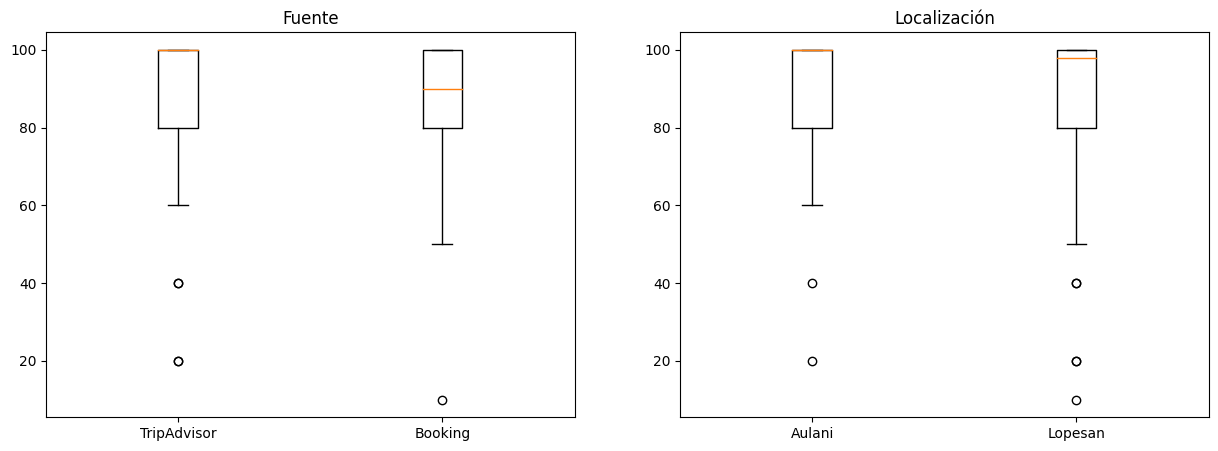

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].set_title('Fuente')
axs[0].boxplot([tripadvisor['rating'], booking['rating']], labels=['TripAdvisor', 'Booking'])

axs[1].set_title('Localización')
axs[1].boxplot([aulani['rating'], lopesan['rating']], labels=['Aulani', 'Lopesan'])

plt.show()

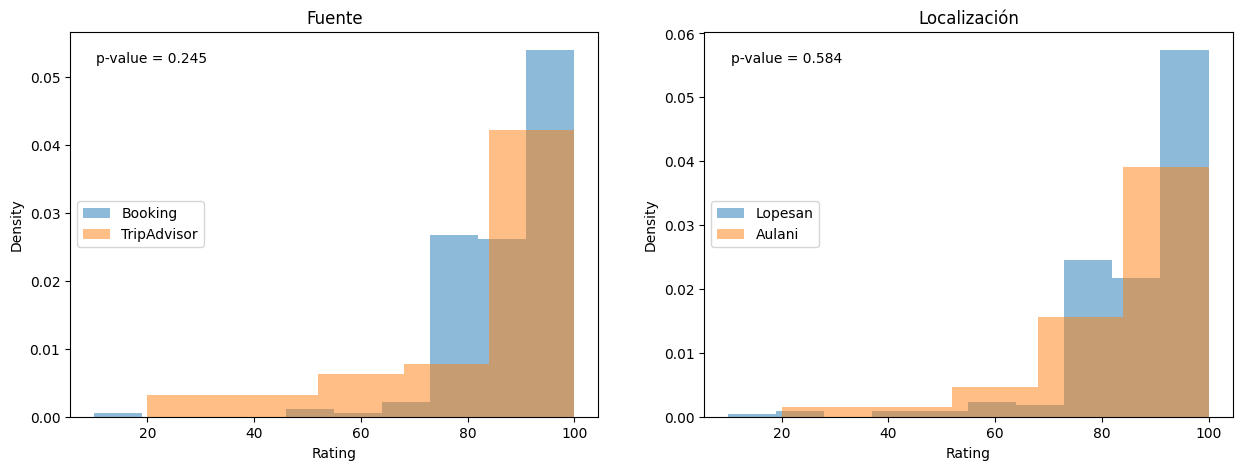

In [6]:
lopesan = df[df['location'] == 'Lopesan Costa Meloneras Resort & Spa']

aulani = df[df['location'] == 'Aulani']

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

src_res = stats.ttest_ind(tripadvisor['rating'], booking['rating'], equal_var=False)

ax[0].hist(booking['rating'], density=True, bins=10, alpha=0.5, label='Booking')
ax[0].hist(tripadvisor['rating'], density=True, bins=5, alpha=0.5, label='TripAdvisor')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Density')
ax[0].text(0.05, 0.95, 'p-value = {:.3f}'.format(src_res.pvalue), transform=ax[0].transAxes, va='top')
ax[0].set_title('Fuente')
ax[0].legend(loc='center left')

loc_res = stats.ttest_ind(lopesan['rating'], aulani['rating'], equal_var=False)

ax[1].hist(lopesan['rating'], density=True, bins=10, alpha=0.5, label='Lopesan')
ax[1].hist(aulani['rating'], density=True, bins=5, alpha=0.5, label='Aulani')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Density')
ax[1].text(0.05, 0.95, 'p-value = {:.3f}'.format(loc_res.pvalue), transform=ax[1].transAxes, va='top')
ax[1].set_title('Localización')
ax[1].legend(loc='center left')

plt.show()

# Analysis cualiltativo

Se puede hacer un analisis cualitativo con el uso de la librería `sentinet_analysis_spanish`.

In [ ]:
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

LinregressResult(slope=0.8468100756783162, intercept=-24.046740433421284, rvalue=0.28146668248212403, pvalue=1.7024410638792257e-06, stderr=0.17314650890454217, intercept_stderr=15.786359703245749)


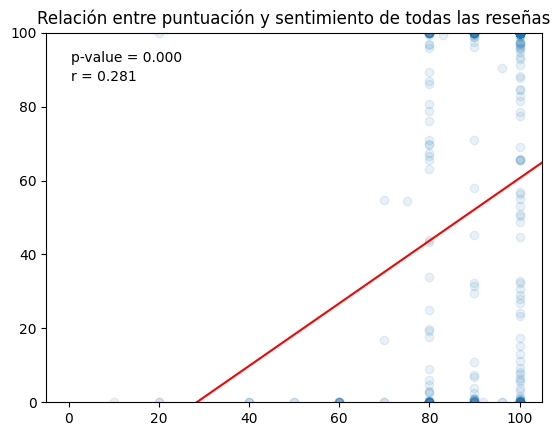

In [9]:
df['sentiment_score'] = df['content'].apply(lambda x: sentiment.sentiment(x) * 100)


# scatterplot between rating and sentiment score

fig, ax = plt.subplots()
ax.scatter(df['rating'], df['sentiment_score'], alpha=0.1)

linreg = stats.linregress(df['rating'], df['sentiment_score'])
ax.axline((0, linreg.intercept), slope=linreg.slope, color='red')
ax.text(0.05, 0.95, 'p-value = {:.3f}'.format(linreg.pvalue), transform=ax.transAxes, va='top')
ax.text(0.05, 0.90, 'r = {:.3f}'.format(linreg.rvalue), transform=ax.transAxes, va='top')
ax.set_ylim(0, 100)
ax.set_title("Relación entre puntuación y sentimiento de todas las reseñas")

plt.show()

Text(0.5, 1.0, 'Relación entre puntuación y sentimiento de TripAdvisor')

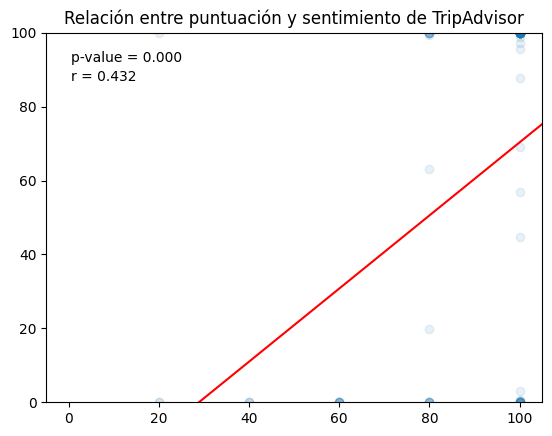

In [10]:
tripadvisor = df[df['source'] == 'TripAdvisor']

reg = stats.linregress(tripadvisor['rating'], tripadvisor['sentiment_score'])

fig, ax = plt.subplots()

ax.scatter(tripadvisor['rating'], tripadvisor['sentiment_score'], alpha=0.1, label='tripadvisor')
ax.axline((0, reg.intercept), slope=reg.slope, color='red')
ax.text(0.05, 0.95, 'p-value = {:.3f}'.format(reg.pvalue), transform=ax.transAxes, va='top')
ax.text(0.05, 0.90, 'r = {:.3f}'.format(reg.rvalue), transform=ax.transAxes, va='top')
ax.set_ylim(0, 100)
ax.set_title("Relación entre puntuación y sentimiento de TripAdvisor")

plt.show()

In [63]:
low_sentiment_high_rating = tripadvisor[(tripadvisor['sentiment_score'] < 20) & (tripadvisor['rating'] > 80)]
low_sentiment_high_rating

,title,content,rating,location,source,sentiment_score
204,UNOS DÍAS EN EL PARAISO: HOTEL COSTA MELONERAS,Visitamos nuevamente este hotel después de las...,100,Lopesan Costa Meloneras Resort & Spa,TripAdvisor,1.392220e-03
215,Lo importante que es sonreir,"Hemos llegado al Hotel Costa Meloneras, al ent...",100,Lopesan Costa Meloneras Resort & Spa,TripAdvisor,9.150264e-22
223,grandioso,un hotel para enmarcar que hace todo lo posibl...,100,Lopesan Costa Meloneras Resort & Spa,TripAdvisor,5.781308e-01
235,Increíble,El hotel genial las piscinas son enormes y pre...,100,Lopesan Costa Meloneras Resort & Spa,TripAdvisor,3.062378e+00
243,Lo mejor para la familia,Hemos estado en 2 oportunidades en Aulani y no...,100,Aulani,TripAdvisor,4.513784e-03
245,Un paraíso dentro del paraíso,Fuimos por primera vez a Hawaii y sinceramente...,100,Aulani,TripAdvisor,1.122360e-12
246,Espectacular ¡¡¡¡ un sueño,"El hotel es lindo, esta ubicado lejos de waiki...",100,Aulani,TripAdvisor,4.862137e-05
251,Excelente estadía para la familia,Los hoteles de Disney generalmente no tienen o...,100,Aulani,TripAdvisor,2.104137e-12
257,Magnífico!!!!,No tengo palabras para describir este hotel!!!...,100,Aulani,TripAdvisor,2.121229e-01
259,Un hotel de mucho lujo pero con precio caros,"Disney Aulani, es un hotel que se encuentra en...",100,Aulani,TripAdvisor,4.348150e-11
